### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2025/1): time and frequency domain analysis of sdof systems

---


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt

from MRPy import *


## Descrição do problema

O pórtico apresentado na figura tem duas colunas flexíveis com massa desprezável
e rigidez horizontal $k = 12EI/L^3$ cada. 
A viga tem rigidez infinita e massa $M = 1000$kg. 
A altura das colunas é $L = 3$m e sua rigidez à flexão, $EI$, é tal que a 
frequência natural de vibração livre do pórtico resulta ser $f_{\rm n} = 10$Hz. 
Sobre a viga está instalado um motor que, por falta de manutenção, resultou desbalanceado. 
A massa do motor já está incluída na massa da viga, $M$. 
O desbalanceamento do motor pode ser descrito como uma massa excêntrica $m = 50$kg, 
girando com frequência $f_0 = 480$ r.p.m (rotações por minuto) e excentricidade $r = 5$mm. 
A componente vertical da força centrípeta não é de interesse, 
sendo que o pórtico é dinamicamente carregado apenas na horizontal. 
O amortecimento viscoso equivalente para o pórtico é $\zeta = 1$%. 

<img src="resources/tests/PEC00025A_251_P1.png" alt="PEC00025A_251_P1" width="540px"/>

## Questão (1):

Calcule as amplitudes das respostas em deslocamento, $u(t)$, velocidade, $v(t)$, 
e aceleração, $a(t)$, com a excitação considerada estacionária. 
Apresente a força estática equivalente para fins de verificação do 
dimensionamento da coluna. (_vibração forçada, domínio da frequência_)

### _Resolução_

Vamos inicialmente criar as variáveis com os parâmetros dados e calcular as
demais propriedades necessárias.


In [2]:
L  =  3.                # altura da coluna (m)
M  =  1000.             # massa da viga + motor (kg)
zt =  0.01              # amortecimento razão do crítico
fn =  10.               # frequência fundamental do pórtico (Hz)
wn =  2*np.pi*fn        # frequência fundamental em rad/s
Tn =  1/fn              # período de vibração (s)

K  =  M*wn*wn           # rigidez das duas colunas somadas k+k (N/m)
EI =  K*(L**3)/12.      # rigidez à flexão equivalente das duas colunas

m  =  50.               # massa excêntrica
r  =  0.005             # excentricidade (m)
f0 =  480./60.          # frequência do motor (Hz)
w0 =  2*np.pi*f0        # velocidade angular do motor (rad/s)

F0 =  m*w0*w0*r         # amplitude da força centrípeta (N)

print('Rigidez das duas colunas .......  K = {0:5.0f} kN/m'.format(K/1000))
print('Rigidez à flexão equivalente ... EI = {0:5.0f} kNm2'.format(EI/1000))
print('Amplitude da excitação ......... F0 = {0:5.0f} N   '.format(F0))
print('Frequência da excitação ........ f0 = {0:5.1f} Hz\n'.format(f0))


Rigidez das duas colunas .......  K =  3948 kN/m
Rigidez à flexão equivalente ... EI =  8883 kNm2
Amplitude da excitação ......... F0 =   632 N   
Frequência da excitação ........ f0 =   8.0 Hz



Para se calcular a resposta dinâmica à uma carga harmônica estacionária, basta
calcular a função de amplificação dinâmica na frequência da excitação: 

$$ A(\beta, \zeta) = \sqrt{ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} }$$

com $\beta = w_0 \, / \, w_{\rm n} = f_0 \, / \, f_{\rm n}$. 
A função de amplificação multiplica a resposta estática à amplitude da carga:

$$ u_{\rm d} = A(\beta, \zeta) \; u_{\rm e} = A(\beta, \zeta) \; \frac{F_0}{k} $$


In [3]:
Adyn = lambda f, zt: np.sqrt(1/( (1 - (f/fn)**2)**2 + (2*zt*(f/fn))**2 ))

A    = Adyn(f0, zt)
ue   = F0/K
ud   = A*ue

print('Fator de amplificação dinâmica .......  A = {0:5.2f}     '.format(A))
print('Deslocamento estático (referência) ... ue = {0:5.2f} mm  '.format(1000*ue))
print('Amplitude do deslocamento dinâmico ... ud = {0:5.2f} mm\n'.format(1000*ud))


Fator de amplificação dinâmica .......  A =  2.78     
Deslocamento estático (referência) ... ue =  0.16 mm  
Amplitude do deslocamento dinâmico ... ud =  0.44 mm



Conhecida a amplitude da resposta dinâmica e considerado o teorema de preservação da frequência, 
podemos calcular as amplitudes de velocidade e deslocamento como:

$$v_{\rm max} = (2\pi f_0)   \; u_{\rm d} $$
$$a_{\rm max} = (2\pi f_0)^2 \; u_{\rm d} $$


In [4]:
vmax   = (2*np.pi*f0) * ud
amax   = (2*np.pi*f0) * vmax

print('Amplitude da velocidade ... v_max = {0:5.1f} mm/s'.format(1000*vmax))
print('Amplitude da aceleração ... a_max = {0:5.1f} mG\n'.format(1000*amax/9.81))


Amplitude da velocidade ... v_max =  22.3 mm/s
Amplitude da aceleração ... a_max = 114.4 mG



Pela figura abaixo, que se aplica a vibrações causadas por máquinas, pode-se ver que, embora
a amplitude em deslocamento seja pequena, a amplitude em velocidade é bastante severa. 
Conforme o gráfico, esse nível de vibração pode inclusive danificar paredes de alvenaria.
(_não esquecer de converter a velocidade em mm/s para in/s, dividindo-se por 25.4_)

<img src="resources/tests/figRausch.jpg" alt="Limite de velocidade para máquinas" width="480px"/>


## Questão (2):

Apresente a resposta em deslocamento no tempo, $u(t)$, que ocorre após a parada suave do motor. 
Quanto tempo leva até a amplitude do deslocamento cair à metade do valor inicial? 
(_vibração livre, domínio do tempo_)

### _Resolução_

Como não é especificado o instante em que o motor é desligado, vamos admitir que a partir
do desligamento as condições iniciais são $u_0 = u_d$ e $v_0 = 0$.
Outras combinações de $u_0$ e $v_0$ são possíveis, mas devem respeitar a solução para 
vibração livre amortecida:

$$ u(t) = \exp{(- \zeta \omega_{\rm n} t)}
   \left[ u_0 \cos \omega_{\rm D}t + \left( \frac{v_0 + \zeta \omega_{\rm n} u_0}
   {\omega_{\rm D}} \right) \sin \omega_{\rm D}t  \right] $$

Invertendo-se a fórmula do envelope de amplitude amortecida pode-se isolar o intervalo de tempo, 
$\Delta t$, necessário para que a amplitude caia a um dado nível (_vide fórmula do decremento logarítmico_).

$$ \frac{u(t + \Delta t)}{u(t)}  = \exp{(-\zeta \omega_{\rm n} \Delta t)} $$

Para cair à metade da amplitude inicial faz-se:
 
$$ \Delta t  = \frac{1}{-\zeta \omega_{\rm n}} \ln \left( \frac{u_{\rm d} /2}{u_{\rm d}} \right)$$


In [5]:
Δt =  np.log(1/2) / (-zt*wn)

print('Tempo para a amplitude decair à metade ... Δt = {0:5.2f} s\n'.format(Δt))


Tempo para a amplitude decair à metade ... Δt =  1.10 s



Abaixo é feito o gráfico do deslocamento em vibração livre a partir das condições iniciais.
O gráfico confirma visualmente o resultado obtido.


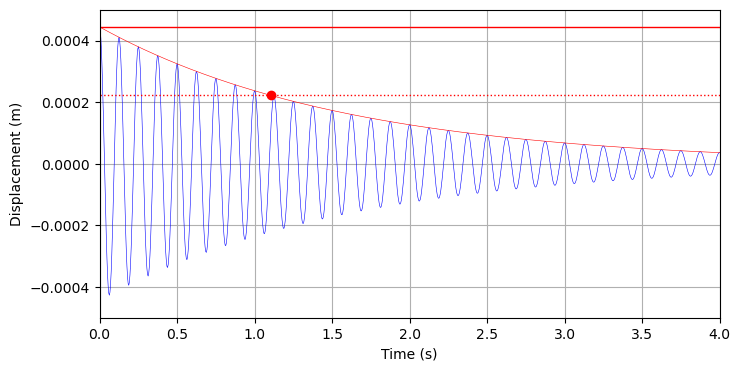

In [6]:
t  = np.linspace(0, 4, 1024)
um = ud*np.exp(-zt*wn*t)
u  = um*np.cos(w0*t)

plt.figure(1, figsize=[8,4], clear=True)

plt.plot(t, u,  'b', lw=0.4)
plt.plot(t, um, 'r', lw=0.4)

plt.plot([0, 4],[ud,   ud  ],'r' , lw=1)
plt.plot([0, 4],[ud/2, ud/2],'r:', lw=1)
plt.plot( Δt,    ud/2,       'ro'      )

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.axis([0, 4, -0.0005, 0.0005])
plt.grid(True)


## Questão (3):

Considere agora que o motor é instantaneamente travado no instante em que $\omega_0 t = \pi/2$ rad. 
Qual o valor do impulso devido ao travamento do motor? 
Qual a resposta em deslocamento no tempo, $u(t)$? 
_Dica: considere a conservação da quantidade de movimento, sendo que 
a componente horizontal da velocidade da massa excêntrica é $v_x = −\omega_0 r \sin(\omega_0 t)$
e a quantidade de movimento da viga também deve ser considerada. (resposta impulsiva, domínio do tempo)_ 

### _Resolução_

No momento em que a massa excêntrica passa pelo ponto mais alto ($\omega_0 t = \pi/2$) 
a componente horizontal da velocidade é:

$$ v_x = \omega_0 r $$

Vamos admitir que a força centrípeta e o deslocamento do pórtico estejam 
aproximadamente em fase, ou seja, o movimento do pórtico acompanha aproximadamente a 
projeção vertical da massa excêntrica. 
Assim, quando $\omega_0 t = \pi/2$ todas as massas estão passando pela posição $u(t) = 0$,
indo da direita para a esquerda, e a quantidade total de movimento é máxima:

$$ I_{\rm max} \approx (M + m) v_{\rm max} + m v_x$$

onde $v_{\rm max}$ já foi calculado na questão (1).

Quando a massa excêntrica trava é aplicada uma força impulsiva na viga, da esquerda para a direita.
O impulso correspondente à essa força corresponde à variação na quantidade total de movimento:

$$ I = m v_x $$

Portanto, ocorre uma redução na velocidade do sistema, calculada como:

$$ I_{\rm max} + I =  (M + m) v_{\rm new} $$

onde $v_{\rm new}$ é a velocidade residual do conjunto motor+viga após a travada.
Após as devidas substituições e isolando-se a nova velocidade:

$$ v_{\rm new} = \frac{M v_{\rm max} - m (v_{\rm max} - \omega_0 r) }{ M + m }$$ 

Os parâmetros acima estão calculados no _script_ abaixo:


In [7]:
Imax = (M + m)*vmax
vx   =  w0*r
I    =  m*vx
vnew = (M*vmax - m*(vmax - vx))/(M + m)

print('Para a massa excêntrica:\n')      
print('Velocidade na hora da travada ............    vx = {0:5.3f} m/s '.format(vx))
print('Variação na quantidade de movimento ......     I = {0:5.2f} Ns\n'.format(I))

print('Para o sistema completo:\n')
print('Velocidade máxima da viga ................ v_max = {0:5.3f} m/s '.format(vmax))
print('Quantidade de movimento máxima ........... I_max = {0:5.2f} Ns'.format(Imax))
print('Velocidade final após a travada .......... v_new = {0:5.3f} m/s\n'.format(vnew))


Para a massa excêntrica:

Velocidade na hora da travada ............    vx = 0.251 m/s 
Variação na quantidade de movimento ......     I = 12.57 Ns

Para o sistema completo:

Velocidade máxima da viga ................ v_max = 0.022 m/s 
Quantidade de movimento máxima ........... I_max = 23.43 Ns
Velocidade final após a travada .......... v_new = 0.032 m/s



A amplitude (em deslocamento) do movimento em vibração livre após a travada do motor será dada por:

$$ u_0 = \frac{v_{\rm new}}{\omega_{\rm n}}$$


In [10]:
u0  =  vnew/wn

print('Amplitude em vibração livre .... u0 = {0:5.2f} mm\n'.format(1000*u0))


Amplitude em vibração livre .... u0 =  0.51 mm



## Questão (4):

Qual a máxima velocidade angular do motor que produz uma resposta em deslocamento 
com mesma amplitude que a resposta estática à carga $F_0$, mas com $\omega_0 > \omega_{\rm n}$ 
(onde $\omega_{\rm n}$ é a frequência natural de vibração livre do pórtico)? 
Qual é essa amplitude?

### _Resolução_

A pergunta se refere aos dois valores de frequência que produzem uma amplificação dinâmica igual a $1$. 
Uma dessas frequências é zero. A outra se encontra após o pico de ressonância em $\omega/\omega_{\rm n} = 1.$
Ou seja, essas frequências são as duas raízes da equação:

$$ A(\beta, \zeta) = \sqrt{\frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2}} = 1$$

ou, simplesmente:

$$ (1 - \beta^2)^2 + (2\zeta\beta)^2 = 1$$

A solução não nula dessa equação depende de $\zeta$, mas é bem pouco sensível a este parâmetro.
Resolvendo na calculadora (equação do 4 grau), tem-se o resultado aproximado de $\beta \approx 1.41$.
Essa solução é graficamente demonstrada abaixo.


In [ ]:
bti =  np.linspace(0, 3, 200)
zti = [0.10, 0.05, 0.01]

plt.figure(6, figsize=(6,4))

for z in zti:
    A  = np.sqrt(1/((1 - bti**2)**2 + (2*z*bti)**2))
    f6 = plt.semilogy(bti, A)

plt.semilogy([1.41, 1.41], [0.1, 100], 'r:', lw=1)
plt.semilogy( 1.41,         1.0,       'ro'      )

plt.legend(zti)
plt.axis([0, 3, 0.1, 100])
plt.ylabel('Dynamic Amplification (nondim)')
plt.xlabel('Normalized frequency')
plt.grid(True)


Portanto, a máxima velocidade angular do motor que produz uma amplitude de resposta igual à resposta estática é:

$$\omega_{0 \rm, max} \approx 1.41 \omega_{\rm n} = 14.1{\rm Hz}$$
